In [34]:
import pandas as pd

In [35]:
data = pd.read_csv("Untitled spreadsheet(1).csv")

In [36]:
data.shape

(2082, 1)

In [37]:
data.head(-1)

,Close
0,118.80
1,114.36
2,111.87
3,113.62
4,112.23
...,...
2076,2635.20
2077,2636.20
2078,2477.00
2079,2523.80


In [38]:
data.index

RangeIndex(start=0, stop=2082, step=1)

<Axes: >

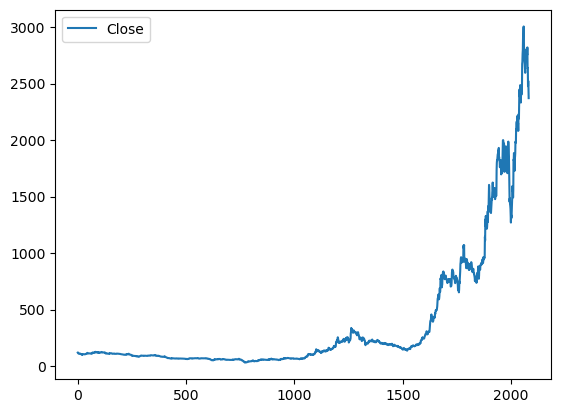

In [39]:
data.plot.line(y="Close", use_index=True)

In [40]:
df = data.reset_index()['Close']

In [41]:
df

0        118.80
1        114.36
2        111.87
3        113.62
4        112.23
         ...   
2077    2636.20
2078    2477.00
2079    2523.80
2080    2466.30
2081    2371.10
Name: Close, Length: 2082, dtype: float64

In [42]:
import numpy as np

In [43]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
df1 = scalar.fit_transform(np.array(df).reshape(-1,1))

In [44]:
df1

array([[0.02936192],
       [0.02786894],
       [0.02703166],
       ...,
       [0.83805886],
       [0.81872411],
       [0.78671249]])

In [45]:
df1.shape

(2082, 1)

In [46]:
#splitting the data into the train test split
trainSize = int(len(df1)*0.80)
testSize = len(df1)-trainSize
train_data, test_data = df1[0:trainSize,:], df1[trainSize:len(df1),:]

In [47]:
import numpy as np
# convert the arrays of values into a dataset matrix
# time_step is tell based on previos this days predict the next day simply making the dependent and independent variables
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [48]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [49]:
# reshape input to be [sample,  time steps,  features] which is required for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [50]:
# create the LSTM model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [51]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam')

C:\Users\Paras\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, verbose=1)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 251ms/step - loss: 9.8453e-04 - val_loss: 0.0052
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - loss: 7.7108e-05 - val_loss: 0.0045
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - loss: 3.6066e-05 - val_loss: 0.0046
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - loss: 3.1196e-05 - val_loss: 0.0108
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - loss: 3.0092e-05 - val_loss: 0.0214
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - loss: 2.6477e-05 - val_loss: 0.0245
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - loss: 2.5451e-05 - val_loss: 0.0334
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - loss: 2.9182e-05 - val_loss: 0.0532
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 219ms/step - loss: 2.2289e-05 - val_loss: 0.0552
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - loss: 2.1647e-05 - val_loss: 0.0596
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - loss: 2.0417e-05 - val_loss: 0.0

In [54]:
import tensorflow as tf

In [55]:
tf.__version__

'2.19.0'

In [56]:
# lETS DO THE PREDICTION AND CHECK THE PERFORMANCE MATRIX
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)


49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


In [57]:
# transform to the original matrix
train_predict = scalar.inverse_transform(train_predict)
test_predict = scalar.inverse_transform(test_predict)


In [58]:
# calculate the Rmse performance matrix
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

153.53131107748993

In [59]:
#  check for the test data
math.sqrt(mean_squared_error(y_test, test_predict))

2054.357125023941

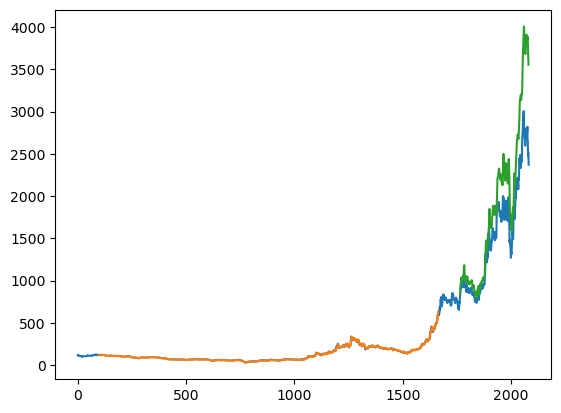

In [60]:
import matplotlib.pyplot as plt
# plottig the data
look_back = 100
trainpredictPlot = np.empty_like(df1)
trainpredictPlot[:,:] = np.nan
trainpredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# for the test data
testpredictPlot = np.empty_like(df1)
testpredictPlot[:,:] = np.nan
testpredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict
# plot the base lin prediction
plt.plot(scalar.inverse_transform(df1))
plt.plot(trainpredictPlot)
plt.plot(testpredictPlot)
plt.show()

In [64]:
x_input = test_data[289:].reshape(1,-1)
x_input.shape

(1, 128)

In [65]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [66]:
from numpy import array

lst_output = []
n_step = 100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_step, 1))
        yhat = model.predict(x_input, verbose = 0)
        print("{} day input {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1,n_step,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1

print(lst_output)


0 day input [0.59336499 0.5947201  0.57284661 0.56347851 0.56739589 0.60015064
 0.63794251 0.66132915 0.66178646 0.65966468 0.63837965 0.63488258
 0.65180637 0.64350083 0.59928983 0.56741271 0.59050008 0.57661941
 0.58413474 0.59640138 0.61321085 0.64322174 0.61345631 0.63122747
 0.6204101  0.57081899 0.58966616 0.57847555 0.56335409 0.57323331
 0.5707013  0.62056814 0.65734788 0.6347817  0.61813028 0.60610911
 0.56805496 0.50878638 0.47804581 0.48860427 0.47128033 0.46616587
 0.45774264 0.43763787 0.41643353 0.43936959 0.42949037 0.43428875
 0.4541985  0.48174463 0.49134476 0.52515535 0.51117717 0.5107972
 0.49096479 0.51446239 0.60362081 0.60207403 0.62324138 0.61943159
 0.60784083 0.57029106 0.61016772 0.61130427 0.62210819 0.6572201
 0.65413663 0.65419379 0.69387206 0.68899634 0.71113211 0.71724189
 0.69594676 0.72520108 0.73382942 0.70216751 0.69628302 0.71275959
 0.68938976 0.73506349 0.73926669 0.72604172 0.76902539 0.80937618
 0.81290687 0.79060298 0.80528394 0.82545933 0.81722

ValueError: cannot reshape array of size 127 into shape (1,100,1)

In [67]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [68]:
df3 = df1.tolist()
df3.extend(lst_output)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

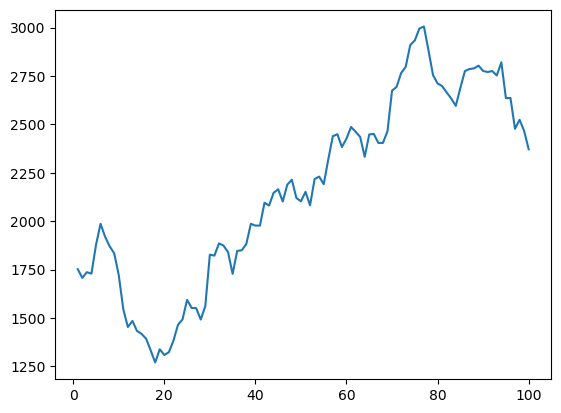

In [74]:

plt.plot(day_new, scalar.inverse_transform(df1[1982:]))
plt.plot(day_pred, scalar.inverse_transform(lst_output))


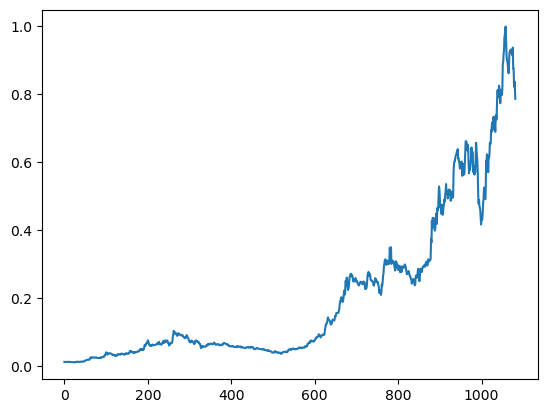

In [75]:
plt.plot(df3[1000:])

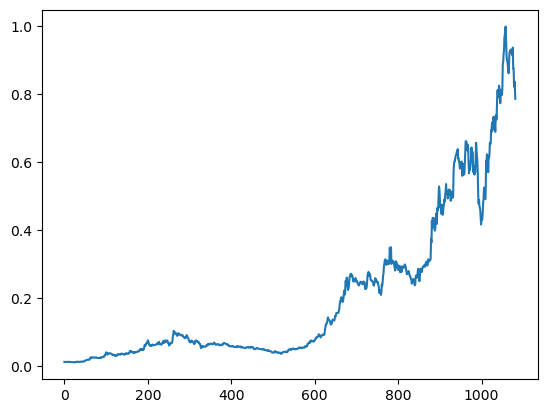

In [76]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])